In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

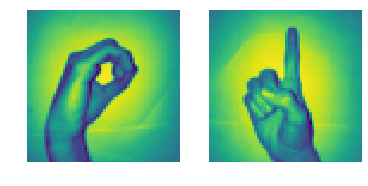

In [2]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print('X shape: ' , X.shape)
print('Y shape: ' , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print('X train flatten',X_train_flatten.shape)
print('X test flatten',X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print('x train: ',x_train.shape)
print('x test: ',x_test.shape)
print('y train: ',y_train.shape)
print('y test: ',y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [8]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [9]:
y_head = sigmoid(0)
y_head

0.5

In [10]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost

In [11]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight,'derivative_bias': derivative_bias}
    return cost,gradients

In [12]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i, cost))
    parameters = {'weight': w,'bias': b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('Number of Iterarion')
    plt.ylabel('Cost')
    plt.show()
    return parameters, gradients, cost_list

In [13]:
 def predict(w,b,x_test):
        z = sigmoid(np.dot(w.T,x_test)+b)
        Y_prediction = np.zeros((1,x_test.shape[1]))
        for i in range(z.shape[1]):
            if z[0,i]<=0.5:
                Y_prediction[0,i] = 0
            else:
                Y_prediction[0,i] = 1
        return Y_prediction

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


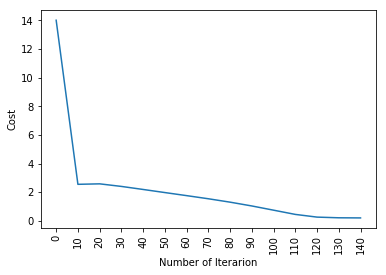

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [14]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters['weight'],parameters['bias'],x_test)
    y_prediction_train = predict(parameters['weight'],parameters['bias'],x_train)
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [15]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print('test accuracy: {} '.format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print('train accuracy: {} '.format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [16]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {'weight1': np.random.randn(3,x_train.shape[0]) * 0.1, 'bias1': np.zeros((3,1)), 'weight2': np.random.randn(y_train.shape[0],3) * 0.1, 'bias2': np.zeros((y_train.shape[0],1))}
    return parameters

In [17]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters['weight1'],x_train) +parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'],A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

In [18]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [19]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache['A2']-Y
    dW2 = np.dot(dZ2,cache['A1'].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters['weight2'].T,dZ2)*(1 - np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {'dweight1': dW1, 'dbias1':db1, 'dweight2': dW2, 'dbias2': db2}
    return grads

In [20]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {'weight1': parameters['weight1']-learning_rate*grads['dweight1'], 'bias1': parameters['bias1']-learning_rate*grads['dbias1'], 'weight2': parameters['weight2']-learning_rate*grads['dweight2'], 'bias2': parameters['bias2']-learning_rate*grads['dbias2']}
    return parameters

In [21]:
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.365593
Cost after iteration 100: 0.358978
Cost after iteration 200: 0.335415
Cost after iteration 300: 0.298246
Cost after iteration 400: 0.255786
Cost after iteration 500: 0.215917
Cost after iteration 600: 0.256079
Cost after iteration 700: 0.191875
Cost after iteration 800: 0.148589
Cost after iteration 900: 0.124037
Cost after iteration 1000: 0.110882
Cost after iteration 1100: 0.100114
Cost after iteration 1200: 0.091064
Cost after iteration 1300: 0.083366
Cost after iteration 1400: 0.076696
Cost after iteration 1500: 0.070789
Cost after iteration 1600: 0.065602
Cost after iteration 1700: 0.061267
Cost after iteration 1800: 0.057727
Cost after iteration 1900: 0.054777
Cost after iteration 2000: 0.052257
Cost after iteration 2100: 0.050067
Cost after iteration 2200: 0.048140
Cost after iteration 2300: 0.046424
Cost after iteration 2400: 0.044879


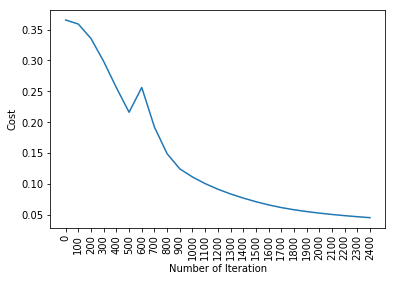

train accuracy: 99.42528735632185 %
test accuracy: 93.54838709677419 %


In [22]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train,parameters)
        cost = compute_cost_NN(A2, y_train, parameters)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print('Cost after iteration %i: %f' %(i, cost))
    plt.plot(index_list,cost_list)    
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))

    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [23]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print('Accuracy mean: '+ str(mean))
print('Accuracy variance: '+ str(variance))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.5000
Epoch 2/100
232/232 [==============================] - 0s 95us/step - loss: 0.6924 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 99us/step - loss: 0.6920 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 112us/step - loss: 0.6908 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 91us/step - loss: 0.6895 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 99us/step - loss: 0.6892 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 116us/step - loss: 0.6868 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 112us/step - loss: 0.6858 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 108us/step - loss: 0.6845 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 99us/step - loss:

232/232 [==============================] - 0s 112us/step - loss: 0.2626 - acc: 0.9526
Epoch 82/100
232/232 [==============================] - 0s 116us/step - loss: 0.2629 - acc: 0.9655
Epoch 83/100
232/232 [==============================] - 0s 116us/step - loss: 0.2635 - acc: 0.9569
Epoch 84/100
232/232 [==============================] - 0s 108us/step - loss: 0.2593 - acc: 0.9612
Epoch 85/100
232/232 [==============================] - 0s 99us/step - loss: 0.2570 - acc: 0.9569
Epoch 86/100
232/232 [==============================] - 0s 108us/step - loss: 0.2563 - acc: 0.9569
Epoch 87/100
232/232 [==============================] - 0s 108us/step - loss: 0.2565 - acc: 0.9698
Epoch 88/100
232/232 [==============================] - 0s 103us/step - loss: 0.2591 - acc: 0.9569
Epoch 89/100
232/232 [==============================] - 0s 103us/step - loss: 0.2601 - acc: 0.9569
Epoch 90/100
232/232 [==============================] - 0s 99us/step - loss: 0.2491 - acc: 0.9569
Epoch 91/100
232/232 [===

232/232 [==============================] - 0s 90us/step - loss: 0.2360 - acc: 0.9784
Epoch 64/100
232/232 [==============================] - 0s 103us/step - loss: 0.2247 - acc: 0.9741
Epoch 65/100
232/232 [==============================] - 0s 125us/step - loss: 0.2199 - acc: 0.9784
Epoch 66/100
232/232 [==============================] - 0s 112us/step - loss: 0.2195 - acc: 0.9698
Epoch 67/100
232/232 [==============================] - 0s 116us/step - loss: 0.2118 - acc: 0.9828
Epoch 68/100
232/232 [==============================] - 0s 103us/step - loss: 0.2101 - acc: 0.9784
Epoch 69/100
232/232 [==============================] - 0s 99us/step - loss: 0.2047 - acc: 0.9784
Epoch 70/100
232/232 [==============================] - 0s 116us/step - loss: 0.2018 - acc: 0.9828
Epoch 71/100
232/232 [==============================] - 0s 108us/step - loss: 0.1963 - acc: 0.9828
Epoch 72/100
232/232 [==============================] - 0s 95us/step - loss: 0.1934 - acc: 0.9784
Epoch 73/100
232/232 [====

232/232 [==============================] - 0s 116us/step - loss: 0.3440 - acc: 0.9569
Epoch 46/100
232/232 [==============================] - 0s 112us/step - loss: 0.3452 - acc: 0.9397
Epoch 47/100
232/232 [==============================] - 0s 116us/step - loss: 0.3350 - acc: 0.9526
Epoch 48/100
232/232 [==============================] - 0s 108us/step - loss: 0.3342 - acc: 0.9655
Epoch 49/100
232/232 [==============================] - 0s 103us/step - loss: 0.3310 - acc: 0.9483
Epoch 50/100
232/232 [==============================] - 0s 103us/step - loss: 0.3292 - acc: 0.9828
Epoch 51/100
232/232 [==============================] - 0s 108us/step - loss: 0.3297 - acc: 0.9224
Epoch 52/100
232/232 [==============================] - 0s 112us/step - loss: 0.3243 - acc: 0.9698
Epoch 53/100
232/232 [==============================] - 0s 108us/step - loss: 0.3191 - acc: 0.9569
Epoch 54/100
232/232 [==============================] - 0s 121us/step - loss: 0.3174 - acc: 0.9612
Epoch 55/100
232/232 [=